In [1]:
import os
import cv2
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import pickle
import random
from tqdm.notebook import tqdm
import numpy as np

In [2]:
data = pd.read_csv('../UTKFace.csv')
image_filenames = data['filename']
labels_age = data['age']
labels_gender = data['gender']
labels_ethnicity = data['race']

In [3]:
features = []
labels_age_encoded = []
labels_gender_encoded = []
labels_ethnicity_encoded = []

In [4]:
def extract_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    flattened_features = gray.flatten()  
    return flattened_features

In [5]:
for image_filename in image_filenames:
    image_path = os.path.join('../UTKFace/', image_filename)
    image = cv2.imread(image_path)
    img_features = extract_features(image)
    features.append(img_features)

In [6]:
# Age labels
labels_age_encoded = pd.cut(labels_age, bins=[0, 28, 116], labels=[0, 1], include_lowest=True).astype(int)

# Gender labels (0 for male, 1 for female)
labels_gender_encoded = labels_gender.astype(int)

# Ethnicity labels
labels_ethnicity_encoded = labels_ethnicity.astype(int)
temp_enc = OneHotEncoder()
transformed = temp_enc.fit_transform(labels_ethnicity_encoded.values.reshape(-1,1))
labels_ethnicity_encoded = transformed.toarray()

In [7]:
_, X_temp, _, y_temp = train_test_split(features, labels_age_encoded, test_size=0.8, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_temp, y_temp, test_size=0.8, random_state=42)

  0%|          | 0/20 [00:00<?, ?it/s]

1 -> 0.6115212233060902
2 -> 0.6310308462958081
3 -> 0.6437516477722119
4 -> 0.6496836277353019
5 -> 0.643422093329818
6 -> 0.6421697864487214
7 -> 0.6542314790403375
8 -> 0.6513313999472713
9 -> 0.6508700237279198
10 -> 0.6376878460321646
11 -> 0.6374901133667282
12 -> 0.6384787766939098
13 -> 0.6364355391510678
14 -> 0.6276693909833905
15 -> 0.634326390719747
16 -> 0.6324808858423412
17 -> 0.6326786185077775
18 -> 0.6290535196414447
19 -> 0.625757975217506
20 -> 0.6359741629317163


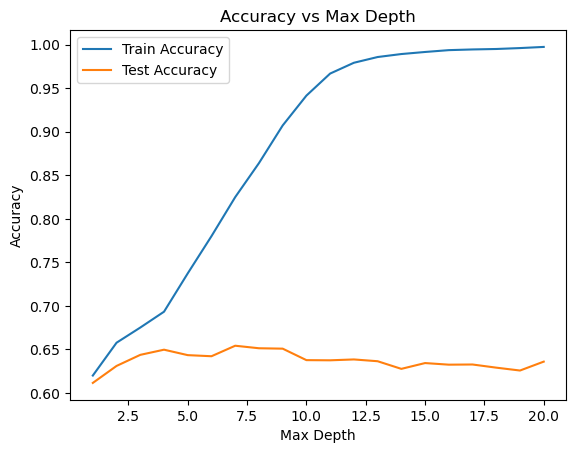

In [8]:
# Define the range of max depths to iterate over
max_depths = range(1, 21)

# Initialize lists to store accuracy values
train_accuracy_values = []
test_accuracy_values = []

# Iterate over different max depths
for depth in tqdm(max_depths):
    # Initialize and train Decision Tree classifier
    clf = DecisionTreeClassifier(max_depth=depth)
    clf.fit(X_train, y_train)
    
    # Predict labels for training set
    y_train_pred = clf.predict(X_train)
    
    # Predict labels for test set
    y_test_pred = clf.predict(X_test)
    
    # Calculate accuracy for training and test sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Append accuracy values to the respective lists
    train_accuracy_values.append(train_accuracy)
    test_accuracy_values.append(test_accuracy)
    print(depth, "->", test_accuracy)

# Plot the graph
plt.plot(max_depths, train_accuracy_values, label='Train Accuracy')
plt.plot(max_depths, test_accuracy_values, label='Test Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Depth')
plt.legend()
plt.show()

- Age: Max depth = 7
- Gender: Max depth = 7